# Amazon product co-purchasing network from March 2 2003

### Dataset is based on Customers Who Bought This Item Also Bought feature of the Amazon website

Analyse the Amazon products graphs and recommend products from the graph.

In [1]:
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd

C:\Users\Rutuja Gujare\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip install pyvis --quiet

In [3]:
from pyvis.network import Network

In [4]:
amazon_df = pd.read_csv('amazon_data.csv', nrows = 1500)

In [5]:
amazon_df.head(5)

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [6]:
amazon_df.shape

(1500, 2)

### Network Statistics

In [7]:
amazon_df_clean = amazon_df[(amazon_df["FromNodeId"] != '') & (amazon_df["ToNodeId"] != '')]

In [8]:
# List of nodes
nodes = list(set([str(x).strip().lower() for x in amazon_df_clean["FromNodeId"]] + [str(x).strip().lower() for x in amazon_df_clean["ToNodeId"]]))

# set of all products i and frequently bought products j
len(nodes)

564

The above network is directed and the direction is from FromNodeId ->ToNodeId

In [9]:
edges = amazon_df_clean.drop_duplicates() # is the edges of the network

edges.head()

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Adding weights for an edge

In [10]:
weights = amazon_df_clean.groupby(["FromNodeId", "ToNodeId"]).size().reset_index()
weights.columns = ["FromNodeId", "ToNodeId", "Weight"]
weights

,FromNodeId,ToNodeId,Weight
0,0,1,1
1,0,2,1
2,0,3,1
3,0,4,1
4,0,5,1
...,...,...,...
1495,311,152,1
1496,311,680,1
1497,311,681,1
1498,311,682,1


In [11]:
# Ensure the sum of weights for all outgoing links from a node is 1

weights["new_weight"] = round(weights["Weight"]/weights.groupby('ToNodeId')["Weight"].transform('sum'), 4)

In [12]:
weighted_edges = pd.merge(edges, weights[["FromNodeId", "ToNodeId", "new_weight"]], how="inner", on=["FromNodeId", "ToNodeId"])

In [13]:
weighted_edges.head()

,FromNodeId,ToNodeId,new_weight
0,0,1,1.0000
1,0,2,0.5000
2,0,3,1.0000
3,0,4,0.0909
4,0,5,0.1429


In [14]:
#get merged edges with weights dataset
weighted_edges.columns = ["FromNodeId", "ToNodeId","weight"]
weighted_edges.to_csv("Amazon_weighted_data.csv", index=False)

In [15]:
#create edgelist and load
graph = nx.from_pandas_edgelist(weighted_edges, "FromNodeId", "ToNodeId", edge_attr=["weight"])

In [16]:
list(graph.nodes())[:5]

[0, 1, 2, 3, 4]

In [17]:
list(graph.edges.data())[:5]

[(0, 1, {'weight': 0.5}),
 (0, 2, {'weight': 0.5}),
 (0, 3, {'weight': 1.0}),
 (0, 4, {'weight': 0.0909}),
 (0, 5, {'weight': 0.1429})]

In [18]:
list(graph.neighbors(n=10))[1:10]

[7, 137, 138, 139]

In [19]:
print(f"Number of nodes of graph: {len(graph.nodes)}")
print(f"Number of edges of graph: {len(graph.edges)}")

Number of nodes of graph: 564
Number of edges of graph: 1164


In [20]:
short_dist=min(nx.connected_components(graph),key=len)
short_dist

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [21]:
dens=nx.density(graph)
dens

0.007331544537243491

In [22]:
average_degree = sum(dict(graph.degree()).values()) / len(graph.nodes)
average_degree

4.127659574468085

In [23]:
in_degrees = graph.degree()
most_bought_product = max(in_degrees, key=lambda x: x[1])
product_id, frequency = most_bought_product
print(f"The most frequently bought product has ID {product_id} with a frequency of {frequency}.")

The most frequently bought product has ID 8 with a frequency of 29.


In [24]:
least_bought_product = min((degree for degree in in_degrees if degree[1] > 0), key=lambda x: x[1], default=None)

if least_bought_product:
    product_id, frequency = least_bought_product
    print(f"The least frequently bought product has ID {product_id} with a frequency of {frequency}.")
else:
    print("All products have an in-degree of 0 or no products are present.")

The least frequently bought product has ID 418 with a frequency of 1.


### Node Importance

In [25]:
#Degree Centrality 
simple_deg = graph.degree()
print(sorted(dict(simple_deg).items(), key=lambda kv: kv[1], reverse=True)[:10])

weighted_deg = graph.degree(weight='weight')
print(sorted(dict(weighted_deg).items(), key=lambda kv: kv[1], reverse=True)[:10])

simple_dc = nx.degree_centrality(graph)
print(sorted(simple_dc.items(), key=lambda kv: kv[1], reverse=True)[:10])

[(8, 29), (7, 18), (11, 16), (63, 16), (20, 16), (30, 16), (23, 16), (78, 16), (13, 15), (18, 15)]
[(147, 6.0003), (279, 6.0), (195, 6.0), (200, 6.0), (227, 6.0), (149, 5.5), (280, 5.5), (230, 5.5), (258, 5.5), (231, 5.3332999999999995)]
[(8, 0.05150976909413855), (7, 0.03197158081705151), (11, 0.028419182948490232), (63, 0.028419182948490232), (20, 0.028419182948490232), (30, 0.028419182948490232), (23, 0.028419182948490232), (78, 0.028419182948490232), (13, 0.026642984014209593), (18, 0.026642984014209593)]


In [26]:
#Betweenness Centrality
betweenness = nx.betweenness_centrality(graph, weight=None)
sorted(betweenness.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(8, 0.3843962854725635),
 (20, 0.131792812463965),
 (30, 0.1232120564369593),
 (17, 0.11957581353939298),
 (7, 0.09485078106488798),
 (13, 0.09126154536787949),
 (4, 0.08952961035421754),
 (18, 0.08515835348287494),
 (15, 0.08404775944102919),
 (1, 0.0808055034839509)]

In [27]:
#Closeness Centrality
closeness = nx.closeness_centrality(graph, distance=None)
sorted(closeness.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(8, 0.29292403746097817),
 (20, 0.2725072604065828),
 (7, 0.26860687022900764),
 (30, 0.26357677902621723),
 (17, 0.25944700460829495),
 (13, 0.25672594619243044),
 (6, 0.25625853436504326),
 (23, 0.25314748201438847),
 (21, 0.2516763522574877),
 (5, 0.24900486510393632)]

In [28]:
#Eigen centrality
eigen = nx.eigenvector_centrality(graph, weight='weight', max_iter=2000, tol=1e-06)
sorted(eigen.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(197, 0.43547632714173107),
 (230, 0.40366886349220765),
 (227, 0.3811089855993906),
 (231, 0.37031678015824665),
 (229, 0.212244913554574),
 (335, 0.14945324349985284),
 (336, 0.14945324349985284),
 (337, 0.14945324349985284),
 (338, 0.14945324349985284),
 (380, 0.1411007347811316)]

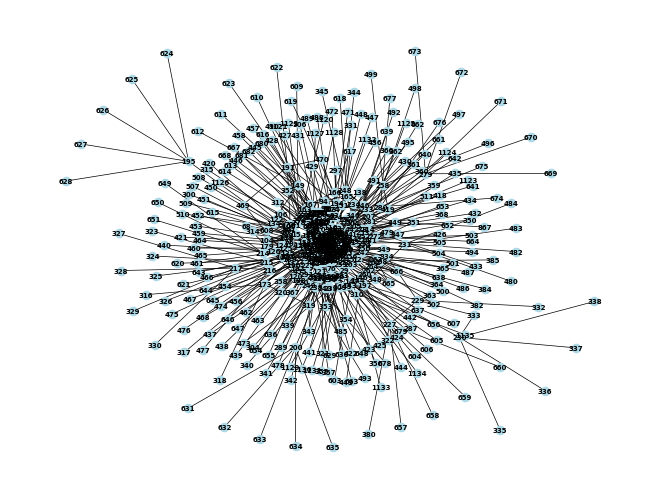

In [29]:
nx.draw(graph, pos=nx.kamada_kawai_layout(graph),
        with_labels = True, font_size=5, font_weight='bold',
        width=0.5, node_size=35, node_color='lightblue')

In [30]:
from IPython.core.display import display, HTML

# construct a new graph object just for this plot.
# this time, I don't load the weights. I like the nt.repulsion() plot layout, but
# it visualizes weight as edge thickness. Some edges are too thick to look good.
hp1_g_plot = nx.from_pandas_edgelist(weighted_edges, source='FromNodeId', target='ToNodeId')

# set node size (more relationship bigger node)
node_degree = dict(hp1_g_plot.degree)
nx.set_node_attributes(hp1_g_plot, node_degree, 'size')

# plot using pyvis
nt = Network(notebook=True, cdn_resources='remote', bgcolor="#222222", font_color="white")

# nt.toggle_hide_edges_on_drag(True)

# set a plot layout model (some of them seem to have a bug that resets edge weights)
# nt.barnes_hut()
# nt.force_atlas_2based()
# nt.hrepulsion()
nt.repulsion()

# get the network from an networkx object and plot
nt.from_nx(hp1_g_plot)
nt.show('hp1_visualization.html')
display(HTML('hp1_visualization.html'))

hp1_visualization.html


C:\Users\Rutuja Gujare\AppData\Local\Temp\ipykernel_2580\3039407873.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Communities

In [31]:
# community discovery using Louvain algorithm
communities = nx.community.louvain_communities(graph, weight='weight', seed=111)

In [32]:
print(f"Number of communities (according to greedy modularity algo): {len(communities)}")

Number of communities (according to greedy modularity algo): 27


In [33]:
# check the community with Harry Potter in it
communities[4]

{18,
 32,
 36,
 51,
 148,
 149,
 152,
 153,
 154,
 155,
 208,
 209,
 210,
 274,
 302,
 311,
 445,
 446,
 481,
 511,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 680,
 681,
 682,
 1120,
 1121,
 1122}

In [34]:
communities_dict = {}

for i in range(len(communities)):
  for node in list(communities[i]):
    communities_dict[node] = i

nx.set_node_attributes(hp1_g_plot, communities_dict, name='group')

In [35]:
nt = Network(notebook=True, cdn_resources='remote', bgcolor="#222222", font_color="white")
nt.repulsion()

nt.from_nx(hp1_g_plot)
nt.show('hp1_communities.html')
display(HTML('hp1_communities.html'))

hp1_communities.html
